## 목차

### 1. OTT의 정의

### 2. 프로젝트 목표

### 3. 데이터 소개

#### 3.1. 수집 방법

#### 3.2. 선정 이유

### 4. EDA

#### 4.1. 데이터 확인

#### 4.2. 결측치 확인

#### 4.3. 이상치 확인

#### 4.4. 데이터 전처리

  - 결측치 및 이상치 처리

  - 시계열 데이터 변환

  - Rating → Family-Friendly 컬럼 변환

#### 4.5. 플랫폼별 장르의 분포

#### 4.6. 마켓별 장르의 분포

#### 4.7. 가족친화적 컨텐츠의 연도별 흐름
### 5. 결론
### 6. 회고

## 1. OTT의 정의
- 인터넷으로 방송 프로그램, 영화, 자체 제작 프로그램 등의 미디어 컨텐츠에 대한 스트리밍을 제공하는 서비스

## 2. 프로젝트 목표
- Netflix, Disney +, Amazon Prime video OTT 플랫폼 간의 차이점과 공통점을 기반으로 컨텐츠 트렌드 분석

## 3. 데이터 소개
- Netflix : https://www.kaggle.com/datasets/shivamb/netflix-shows/data

- Disney : https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows/data

- Amazon Prime video : https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows/data

이 데이터셋들은 넷플릭스, 디즈니+, 아마존 프라임 비디오라는 주요 OTT 플랫폼에서 제공하는 다양한 미디어 콘텐츠를 포함하고 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt

netflix_df_path = kagglehub.dataset_download("shivamb/netflix-shows")
amazon_prime_df_path = kagglehub.dataset_download("shivamb/amazon-prime-movies-and-tv-shows")
disney_plus_df_path = kagglehub.dataset_download("shivamb/disney-movies-and-tv-shows")

100%|██████████| 1.34M/1.34M [00:00<00:00, 106MB/s]

Extracting files...


100%|██████████| 1.61M/1.61M [00:00<00:00, 112MB/s]

Extracting files...


100%|██████████| 131k/131k [00:00<00:00, 38.7MB/s]

Extracting files...


In [ ]:
netflix_df = pd.read_csv(netflix_df_path + "/netflix_titles.csv")
amazon_prime_df = pd.read_csv(amazon_prime_df_path + "/amazon_prime_titles.csv")
disney_plus_df = pd.read_csv(disney_plus_df_path + "/disney_plus_titles.csv")

## 4. EDA

#### 4.1 데이터 확인

In [ ]:
netflix_df.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...

In [ ]:
amazon_prime_df.head(2)

show_id   type                 title      director  \
0      s1  Movie   The Grand Seduction  Don McKellar   
1      s2  Movie  Take Care Good Night  Girish Joshi   

                                               cast country      date_added  \
0    Brendan Gleeson, Taylor Kitsch, Gordon Pinsent  Canada  March 30, 2021   
1  Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar   India  March 30, 2021   

   release_year rating duration             listed_in  \
0          2014    NaN  113 min         Comedy, Drama   
1          2018    13+  110 min  Drama, International   

                                         description  
0  A small fishing village must procure a local d...  
1  A Metro Family decides to fight a Cyber Crimin...

In [ ]:
disney_plus_df.head(2)

show_id   type                                             title  \
0      s1  Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2  Movie                            Ernest Saves Christmas   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   

                                                cast country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...     NaN   
1           Jim Varney, Noelle Parker, Douglas Seale     NaN   

          date_added  release_year rating duration          listed_in  \
0  November 26, 2021          2016   TV-G   23 min  Animation, Family   
1  November 26, 2021          1988     PG   91 min             Comedy   

                                         description  
0   Join Mickey and the gang as they duck the halls!  
1  Santa Claus passes his magic bag to a new St. ...

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
amazon_prime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [ ]:
disney_plus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [ ]:
# 각 OTT 플랫폼별 데이터프레임의 shape 출력
print("Netflix DataFrame Shape:", netflix_df.shape)          # Netflix 데이터프레임의 행과 열 수
print("Amazon Prime DataFrame Shape:", amazon_prime_df.shape) # Amazon Prime 데이터프레임의 행과 열 수
print("Disney+ DataFrame Shape:", disney_plus_df.shape)      # Disney+ 데이터프레임의 행과 열 수

Netflix DataFrame Shape: (8807, 12)
Amazon Prime DataFrame Shape: (9668, 12)
Disney+ DataFrame Shape: (1450, 12)


#### 4.2 결측치 확인

In [ ]:
# 넷플릭스 데이터 결측치 확인
for i in netflix_df.columns:
    null_rate = netflix_df[i].isna().sum() / len(netflix_df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

# 아마존 데이터 결측치 확인
for i in amazon_prime_df.columns:
    null_rate = amazon_prime_df[i].isna().sum() / len(amazon_prime_df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

# 디즈니 데이터 결측치 확인
for i in disney_plus_df.columns:
    null_rate = disney_plus_df[i].isna().sum() / len(disney_plus_df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%
director null rate: 21.55%
cast null rate: 12.75%
country null rate: 93.05%
date_added null rate: 98.4%
rating null rate: 3.49%
director null rate: 32.62%
cast null rate: 13.1%
country null rate: 15.1%
date_added null rate: 0.21%
rating null rate: 0.21%


- 6개 컬럼에서 결측치 확인.

In [ ]:
# 아마존 데이터 결측치 확인
for i in amazon_prime_df.columns:
    null_rate = amazon_prime_df[i].isna().sum() / len(amazon_prime_df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 21.55%
cast null rate: 12.75%
country null rate: 93.05%
date_added null rate: 98.4%
rating null rate: 3.49%


- 5개 컬럼에서 결측치 확인
- country, date_added는 90% 이상 결측치가 존재하므로 column 사용하기 제한된다.

In [ ]:
# 디즈니 데이터 결측치 확인
for i in disney_plus_df.columns:
    null_rate = disney_plus_df[i].isna().sum() / len(disney_plus_df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 32.62%
cast null rate: 13.1%
country null rate: 15.1%
date_added null rate: 0.21%
rating null rate: 0.21%


- 5개 컬럼에서 결측치 확인

#### 4.3 이상치 확인
#### Duration

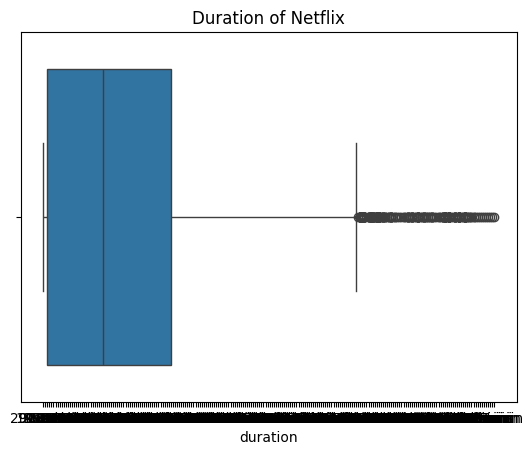

In [ ]:
sns.boxplot(x='duration', data=netflix_df)
plt.title('Duration of Netflix')
plt.show()

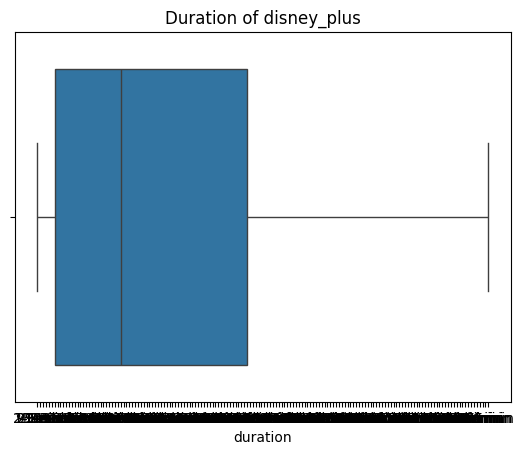

In [ ]:
sns.boxplot(x='duration', data=disney_plus_df)
plt.title('Duration of disney_plus')
plt.show()

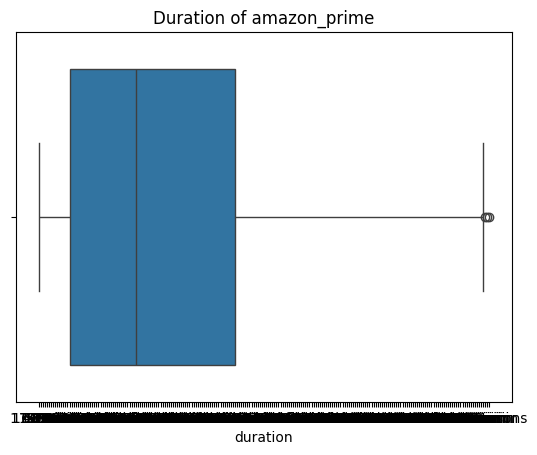

In [ ]:
sns.boxplot(x='duration', data=amazon_prime_df)
plt.title('Duration of amazon_prime')
plt.show()

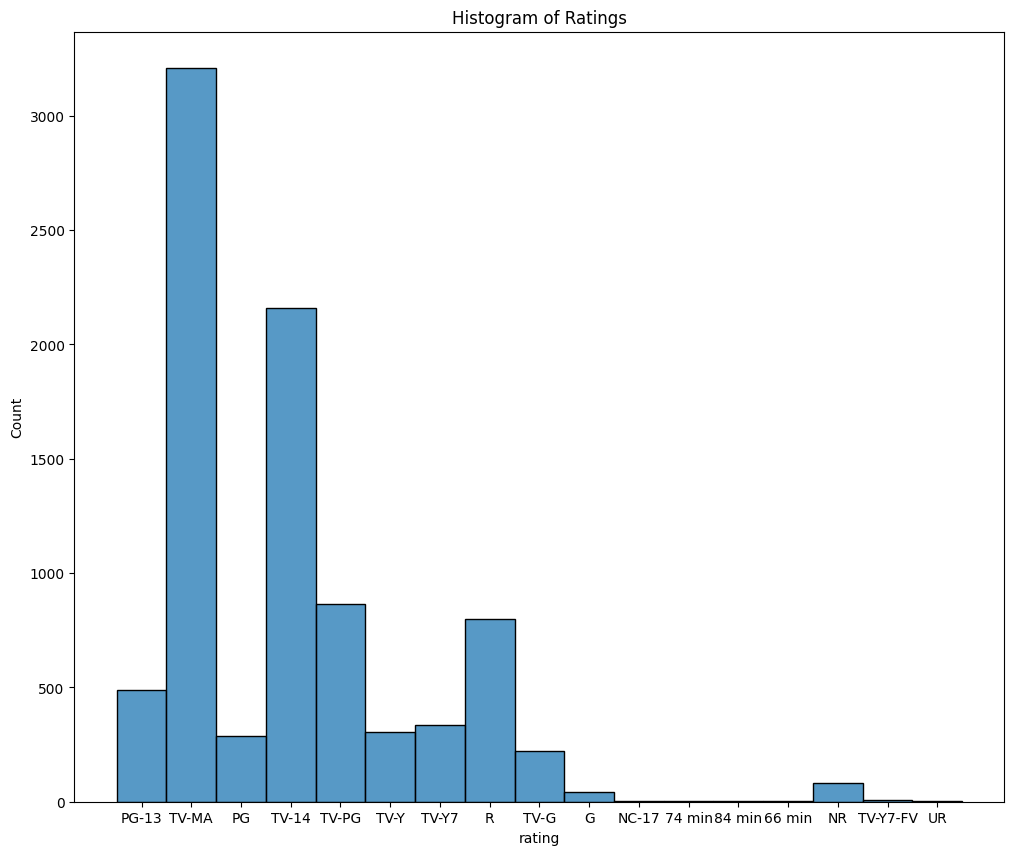

In [ ]:
plt.figure(figsize=(12, 10))
sns.histplot(netflix_df['rating'])
plt.title('Histogram of Ratings')
plt.show()

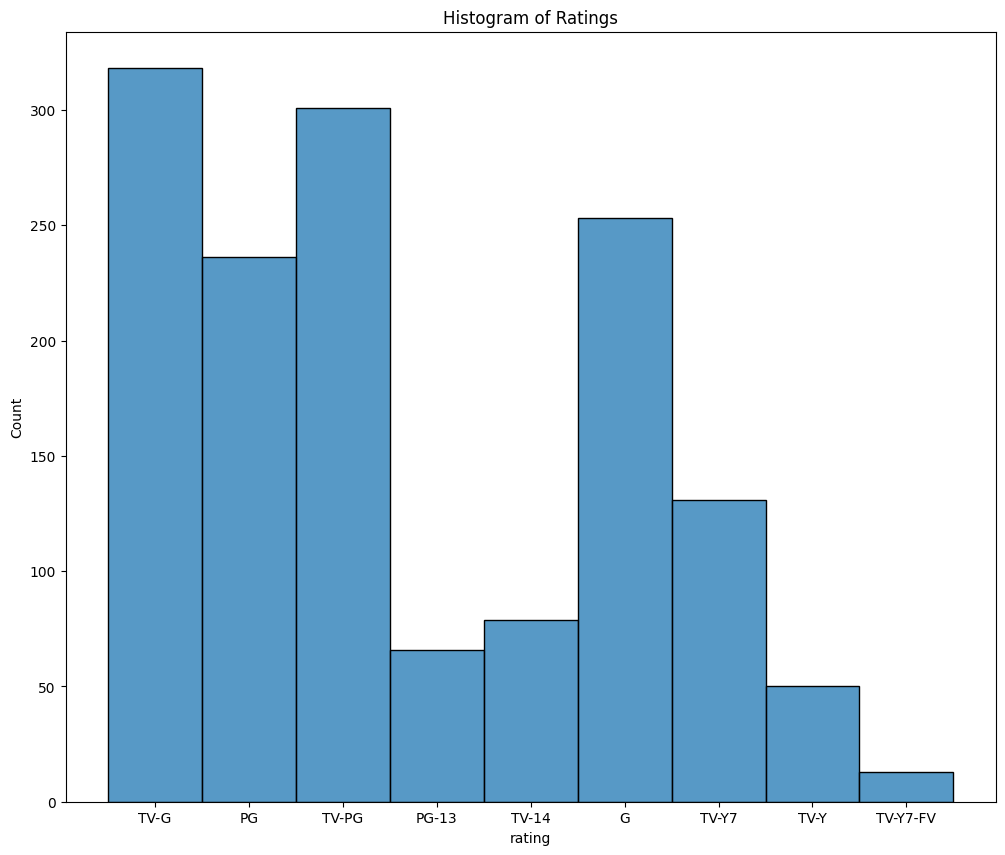

In [ ]:
plt.figure(figsize=(12, 10))
sns.histplot(disney_plus_df['rating'])
plt.title('Histogram of Ratings')
plt.show()

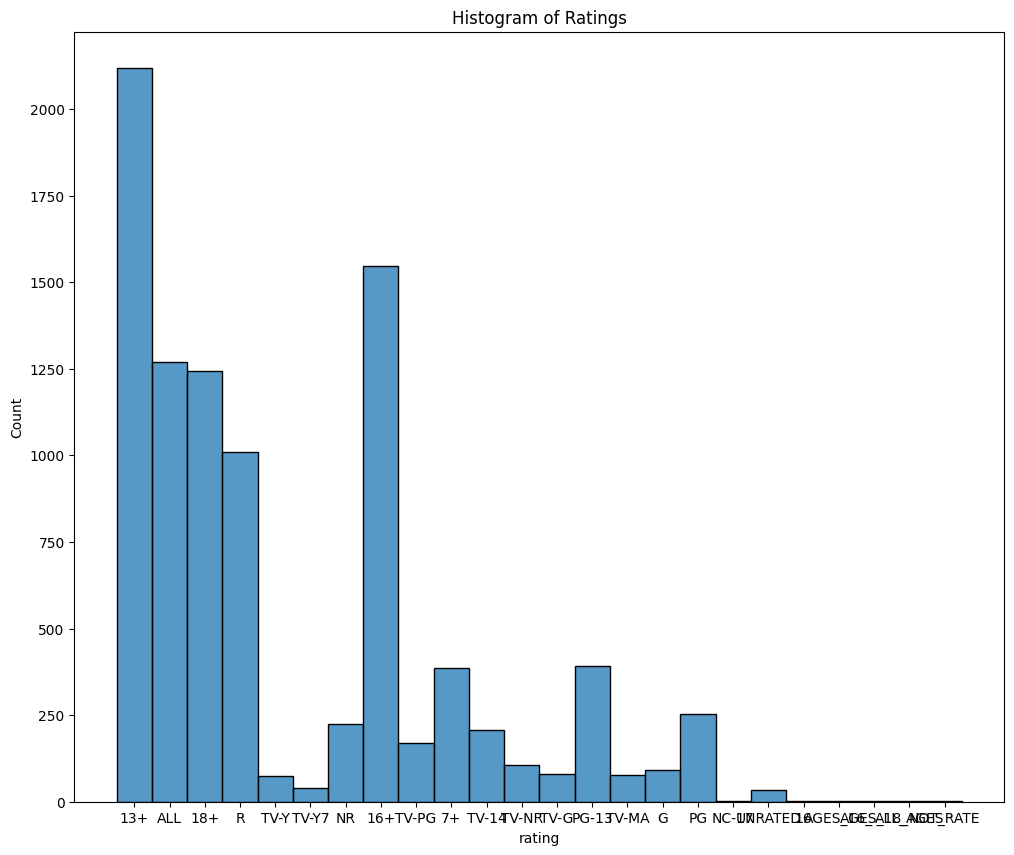

In [ ]:
plt.figure(figsize=(12, 10))
sns.histplot(amazon_prime_df['rating'])
plt.title('Histogram of Ratings')
plt.show()

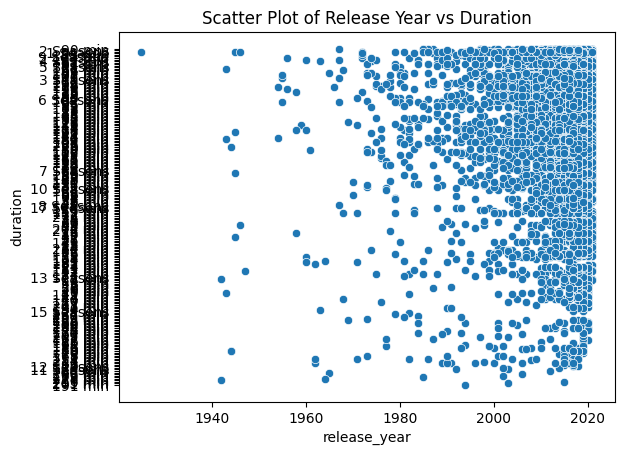

In [ ]:
sns.scatterplot(x='release_year', y='duration', data=netflix_df)
plt.title('Scatter Plot of Release Year vs Duration')
plt.show()

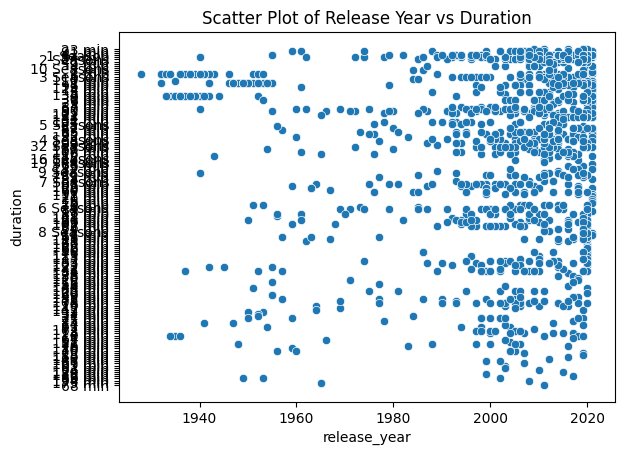

In [ ]:
sns.scatterplot(x='release_year', y='duration', data=disney_plus_df)
plt.title('Scatter Plot of Release Year vs Duration')
plt.show()

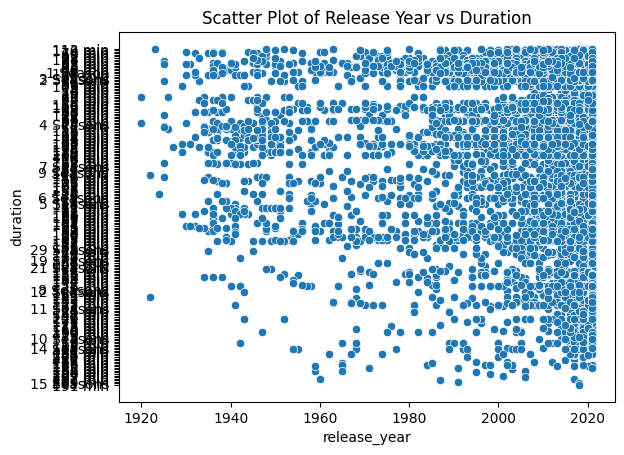

In [ ]:
sns.scatterplot(x='release_year', y='duration', data=amazon_prime_df)
plt.title('Scatter Plot of Release Year vs Duration')
plt.show()

#### 4.4 데이터 전처리
- 결측치 처리
- rating (시청 등급)은 컨텐츠를 시청자층을 예상해볼 수 있으므로 실제 값으로 대체한다.
  - 넷플릭스, 디즈니
    - 5개 미만 데이터이기때문에 검색해서 직접 채워 넣는다.
  - 아마존
    - 약 300개 데이터에 대해 [https://www.primevideo.com/](https://www.primevideo.com/)에서 [크롤링한 데이터](https://github.com/seungboAn/DATAthon/blob/main/crawler/amazon_prime_rating.csv)로 대체한다.

In [ ]:
# Amazon
path = 'Amazon/amazon_prime_rating.csv'
not_nan_rating = pd.read_csv(path)
not_nan_rating = pd.DataFrame(not_nan_rating)
not_nan_rating.isnull().sum()

- Feature Engineering
  - Rating을 성인과 비성인으로 구분하기 위해 등급을 통합하여 'is_family_friendly' 카테고리로 변환하여 사용하였습니다.



```
# 코드로 형식 지정됨

```
# 코드로 형식 지정됨 *이탤릭체 텍스트*
```


```

#### 4.5 플랫폼별 장르의 분포
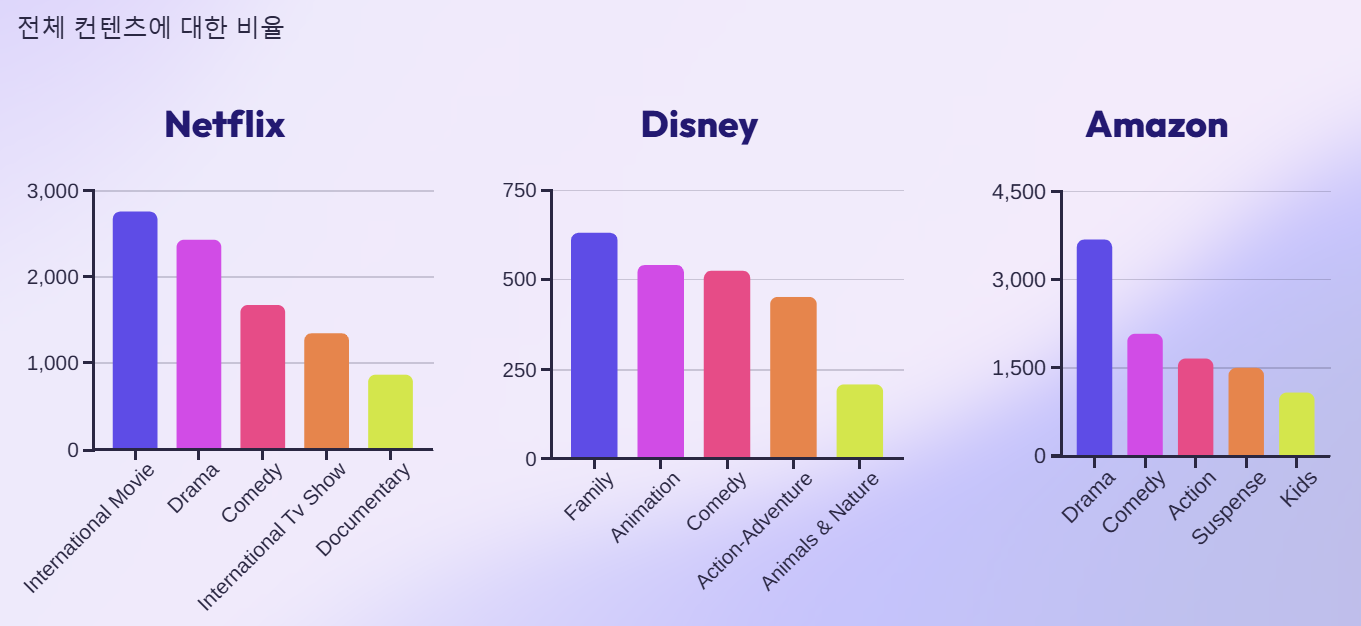

In [ ]:
# Animation 장르에 대한 Family-Friendly 컨텐츠 비교

# Netflix
keywords = ['Anime', 'Animation']
filtered_rows = netflix_df[netflix_df.apply(lambda row: any(word.lower() in ' '.join(row.astype(str)).lower() for word in keywords), axis=1)]
filtered_rows['is_family_friendly'].value_counts()

# Amazon
filtered_rows = amazon_df[zmazon_df.apply(lambda row: any(word.lower() in ' '.join(row.astype(str)).lower() for word in keywords), axis=1)]
filtered_rows['is_family_friendly'].value_counts()

# Disney
filtered_rows = disney_df[disney_df.apply(lambda row: any(word.lower() in ' '.join(row.astype(str)).lower() for word in keywords), axis=1)]
filtered_rows['is_family_friendly'].value_counts()


In [ ]:
# 연도별 가장 많이 추가된 장르 (Netflix)
import pandas as pd
import matplotlib.pyplot as plt

# 'listed_in'에서 카테고리를 쉼표로 나누고 확장
df_copy_exploded = netflix_df.assign(listed_in=netflix_df['listed_in'].str.split(', ')).explode('listed_in')

# 2000년 이후의 데이터만 필터링
df_copy_exploded_filtered = df_copy_exploded[df_copy_exploded['release_year'] >= 2000]

# 1년 단위로 그룹화
category_per_year = df_copy_exploded_filtered.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0)

# 각 카테고리의 총합을 계산하여 상위 5개 카테고리 추출
top_categories = category_per_year.sum(axis=0).nlargest(5).index

# 상위 5개 카테고리만 필터링
category_per_year_top5 = category_per_year[top_categories]

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 라인 그래프 그리기
category_per_year_top5.plot(kind='line', marker='o', figsize=(12, 8))

# 그래프 꾸미기
plt.title('Top 5 Category Distribution by Year (Post 2000)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Categories', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 옆으로 이동
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [ ]:
# 연도별 가장 많이 추가된 장르 (Disney)
import pandas as pd
import matplotlib.pyplot as plt

# 'listed_in'에서 카테고리를 쉼표로 나누고 확장
df_copy_exploded = disney_df.assign(listed_in=disney_df['listed_in'].str.split(', ')).explode('listed_in')

# 2000년 이후의 데이터만 필터링
df_copy_exploded_filtered = df_copy_exploded[df_copy_exploded['release_year'] >= 2000]

# 1년 단위로 그룹화
category_per_year = df_copy_exploded_filtered.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0)

# 각 카테고리의 총합을 계산하여 상위 5개 카테고리 추출
top_categories = category_per_year.sum(axis=0).nlargest(5).index

# 상위 5개 카테고리만 필터링
category_per_year_top5 = category_per_year[top_categories]

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 라인 그래프 그리기
category_per_year_top5.plot(kind='line', marker='o', figsize=(12, 8))

# 그래프 꾸미기
plt.title('Top 5 Category Distribution by Year (Post 2000)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Categories', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 옆으로 이동
plt.tight_layout()  # 레이아웃 조정
plt.show()

#### 4.6 마켓별 장르의 분포

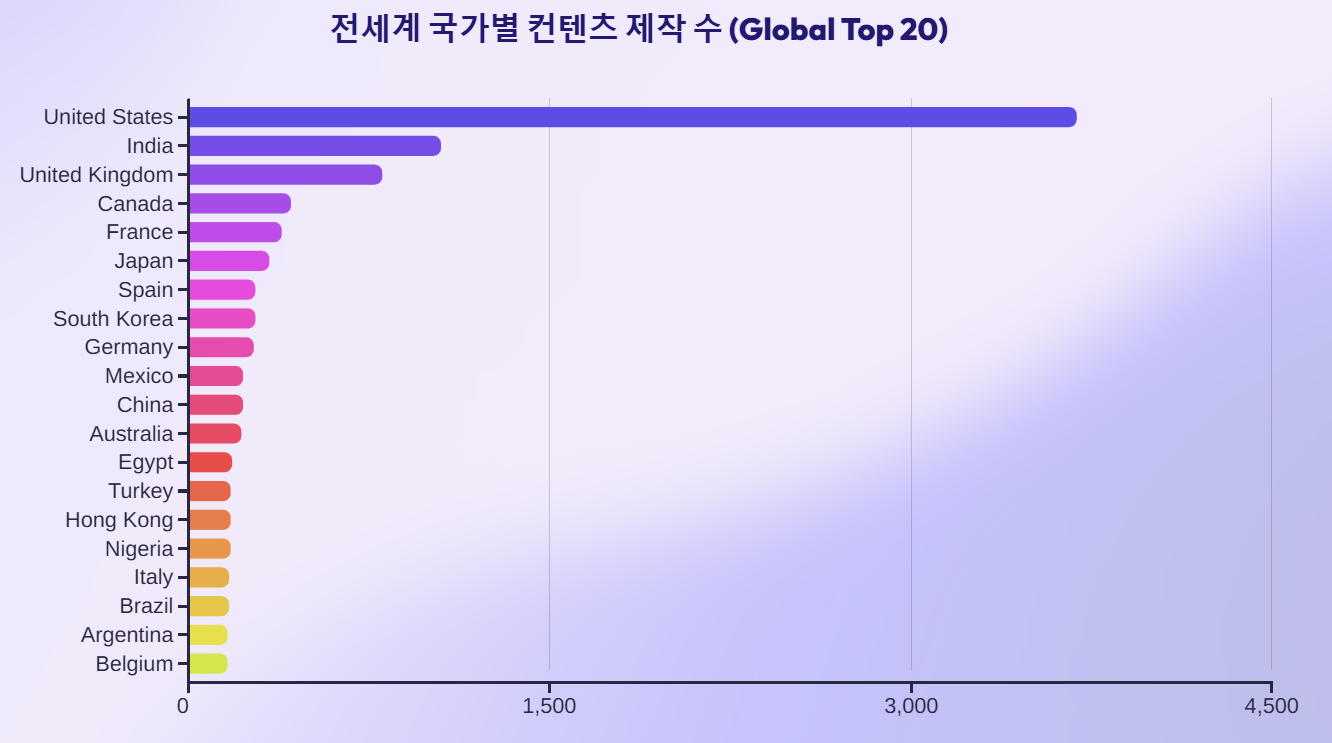

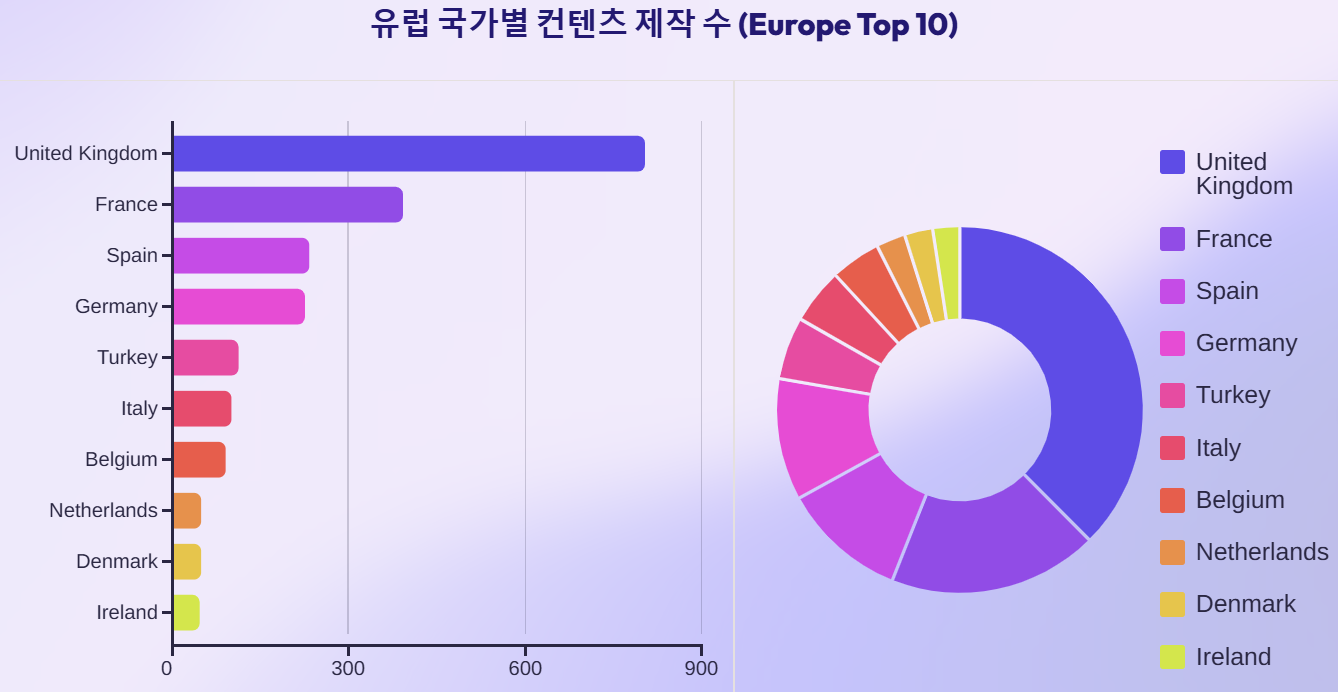

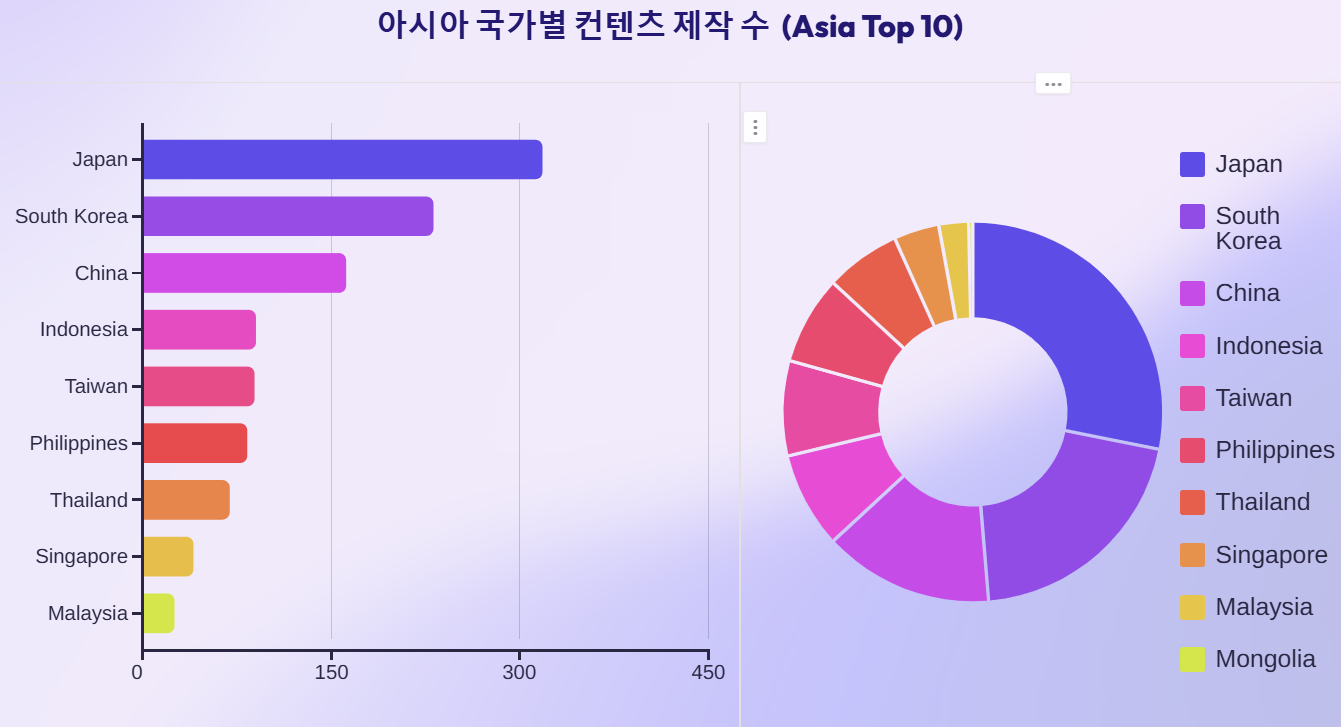

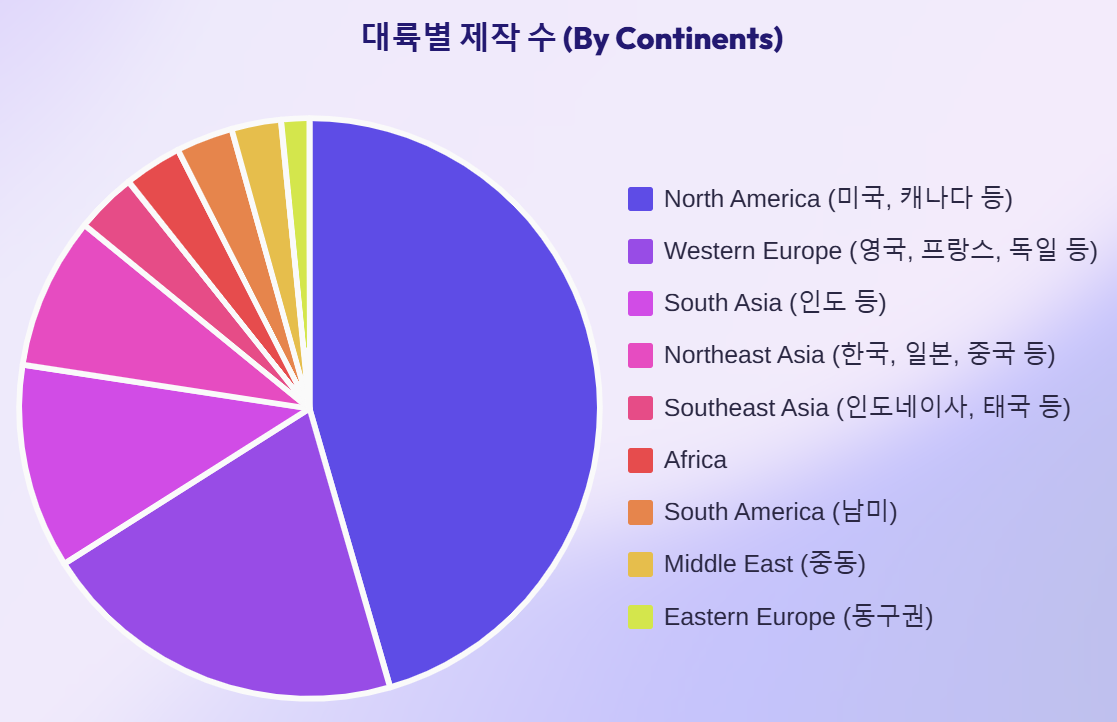

#### 4.7 가족친화적 컨텐츠의 연도별 흐름
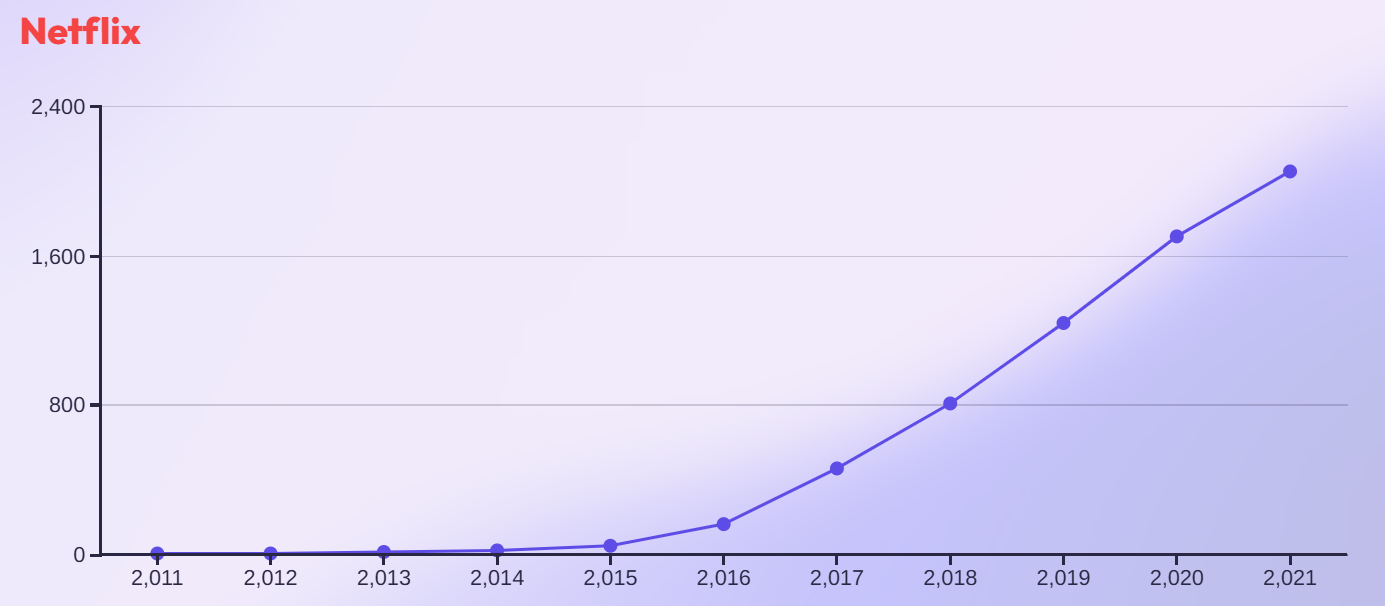

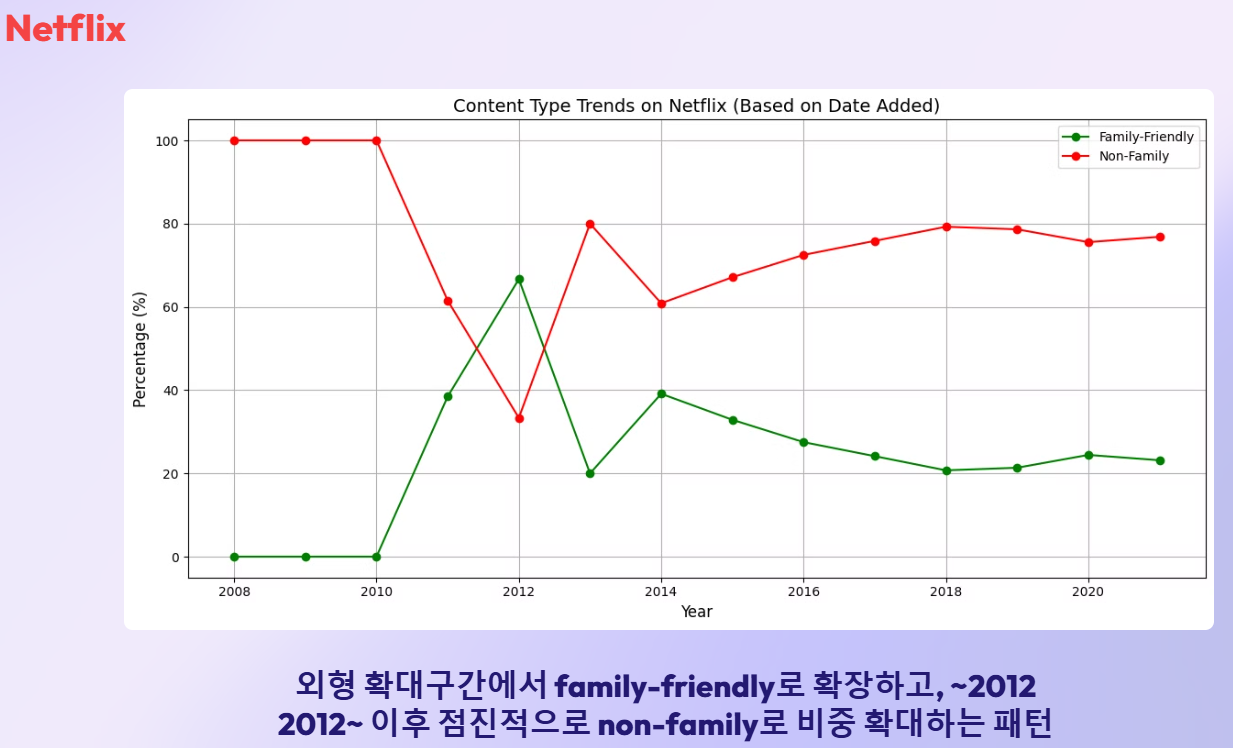

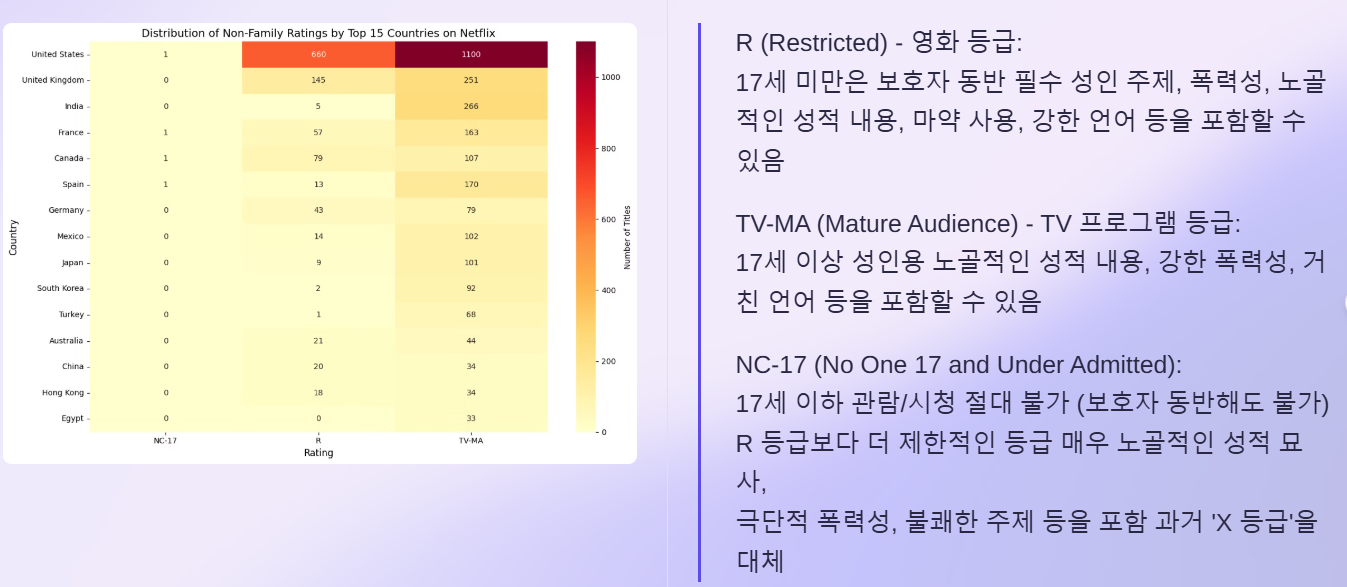

In [ ]:
# 'date_added'를 날짜 형식으로 변환
df_copy['date_added'] = pd.to_datetime(df_copy['date_added'], errors='coerce')

# 'date_added'에서 월 단위 추출 및 'type'별 데이터 집계
df_copy['Month'] = df_copy['date_added'].dt.to_period('M')
type_monthly_data = df_copy.groupby(['Month', 'type']).size().unstack(fill_value=0)

# 꺾은선 그래프 그리기
plt.figure(figsize=(12, 6))
for column in type_monthly_data.columns:
    plt.plot(
        type_monthly_data.index.astype(str),  # x축 값
        type_monthly_data[column],           # y축 값
        marker='o',
        label=column                         # 'type' 값
    )

# 그래프 레이블과 제목 설정
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Disney : Number of Entries Added by Month and Type')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='Type')
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()

# 'type'별 월별 데이터 집계를 DataFrame으로 변환
type_monthly_data_df = type_monthly_data.reset_index()
type_monthly_data_df.columns.name = None  # 컬럼 이름 계층 제거

# CSV 파일로 저장
type_monthly_data_df.to_csv('type_monthly_data.csv', index=False)

print("CSV 파일이 성공적으로 저장되었습니다!")

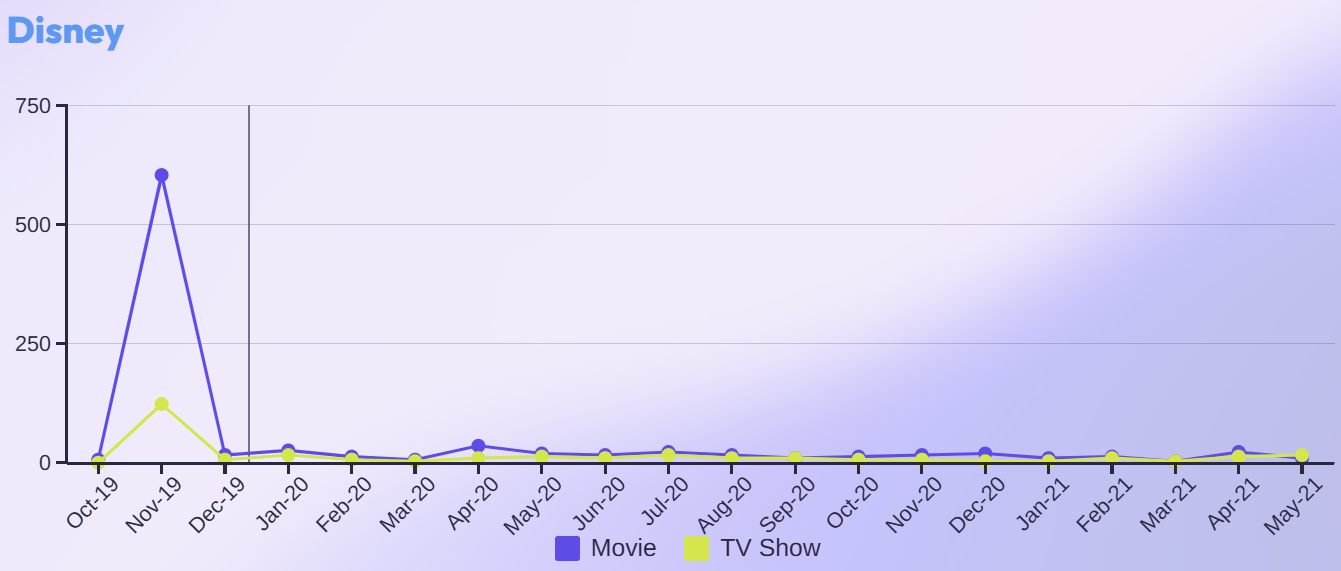

#### 4.8 가설 설정
**4.8.1.** `listed in` (액션, 스릴러, 로맨스)의 컨텐츠는 더 높은 연령 `Rating`을 받을 가능성이 높을 것이다.

**4.8.2.** 특정 `Country` 에서 제작한 컨텐츠는 그 국가의 문화적 가치관에 따라 `Rating`  분포가 다를 것이다.

**4.8.3.** `date_added`에 따른 주력 컨텐츠 `rating`과 `listed in`가 있을 것이고(데이터셋), 그것이 수익성을 반영할 것이다(외부자료).

- 특정 Rating의 콘텐츠는 특정 플랫폼에 추가된 시점(`date_added`)에 집중적으로 출시되며, 이는 시청 트렌드와 연관이 있다.
- **코로나**가 시작된 이후(`data_added`)로 컨텐츠의 전체 관람가로 설정된 `Rating`의 비중이 증가했을 것.
- 2016년 미국 대선 이후 (`data_added`) 로 OTT 컨텐츠 등급에 대한 ~ 규제로 `Rating`에 변화가 있었을 것이다. (정책)
- Disney
    
      → 디즈니 플러스는 코로나 영향에 따른 제작편수 및 rating 의 뚜렷한 변화는 감지되지 않음.

**4.8.4.** `type` 에 따라 `rating` 의 분포가 다를 것이다.
**4.8.5.** OTT 플랫폼에 따라 동일한 Genre의 콘텐츠라도 Rating 분포가 다를 것이다.

4.8.6. 디즈니 플러스가 출시되는 2019년 11월 12일 시기 전후로 전체 연령 등급이 많이 생겨났을 것이다.

- 디즈니 플러스는 가족 친화적인 컨텐츠를 내세웠다.

4.8.7. 아마존 프라임 비디오가 출시되는 2016년 12월 14일 시기 전후로 연령 등급에 차이가 많이 없었을 것이다.

- 아마존 프라임은 전 연령층을 대상으로 컨텐츠를 제공

4.8.8. 2016년 미국의 상위 방송국 중 13개 방송사와 넷플릭스가 제휴했기때문에 전체 등급 컨텐츠가 많이 늘어났을 것이다.

In [ ]:
# 'listed_in'에서 카테고리를 세미콜론으로 나누고 모든 카테고리를 한 리스트로 확장
categories = df_copy['listed_in'].str.split(', ').explode()

# 카테고리별 개수 계산
category_counts = categories.value_counts()

# 모든 카테고리를 보여주는 세로 막대 그래프
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')

# 그래프 꾸미기
plt.title('All Categories in listed_in')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # x축 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

#### 4.9 가설 검증
- 4.9.1. listed in (액션, 스릴러, 로맨스)의 컨텐츠는 더 높은 연령 Rating을 받을 가능성이 높을 것이다.

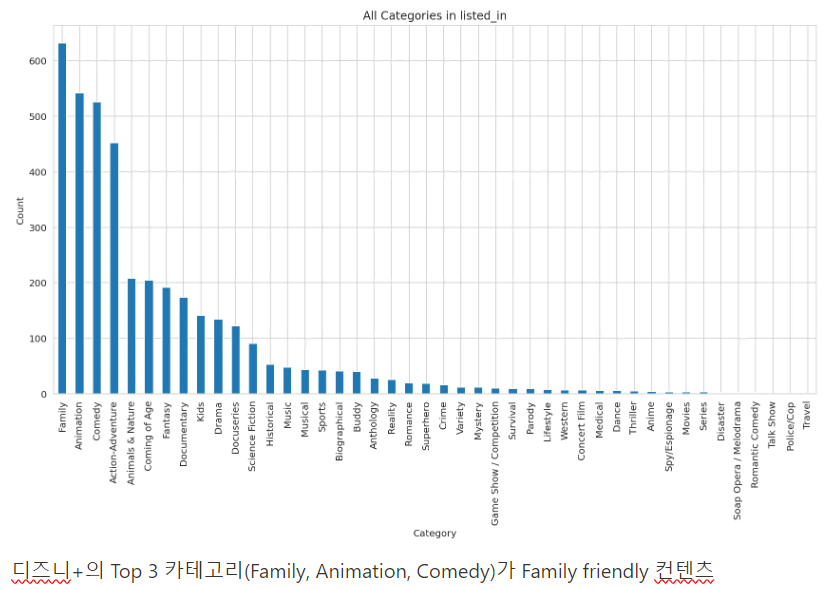

In [ ]:
# rating을 성인, 전체이용 의 분류로 두 컬럼의 관계 보기.
# 데이터 재구성
pivot_data = amazon_prime_df.pivot_table(index='listed_in', columns='is_family_friendly', aggfunc='size', fill_value=0)

# 상위 50가지의 장르(listed_in)
top_50_genre = pivot_data.sum(axis=1).nlargest(50).index
pivot_data_top50 = pivot_data.loc[top_50_genre]

# 데이터 정규화 (백분율로 변환)
normalized_data = pivot_data_top50.div(pivot_data_top50.sum(axis=1), axis=0) * 100

# 히트맵 생성
plt.figure(figsize=(1.5, 15))
sns.heatmap(normalized_data, annot=True, cmap='YlOrRd', fmt='.1f',
            cbar_kws={'label': 'Percentage'}, linewidths=0.5)



plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Movie : Between  and rating ')
plt.xlabel('18+ / ALL')
plt.ylabel('Genre')

plt.show()

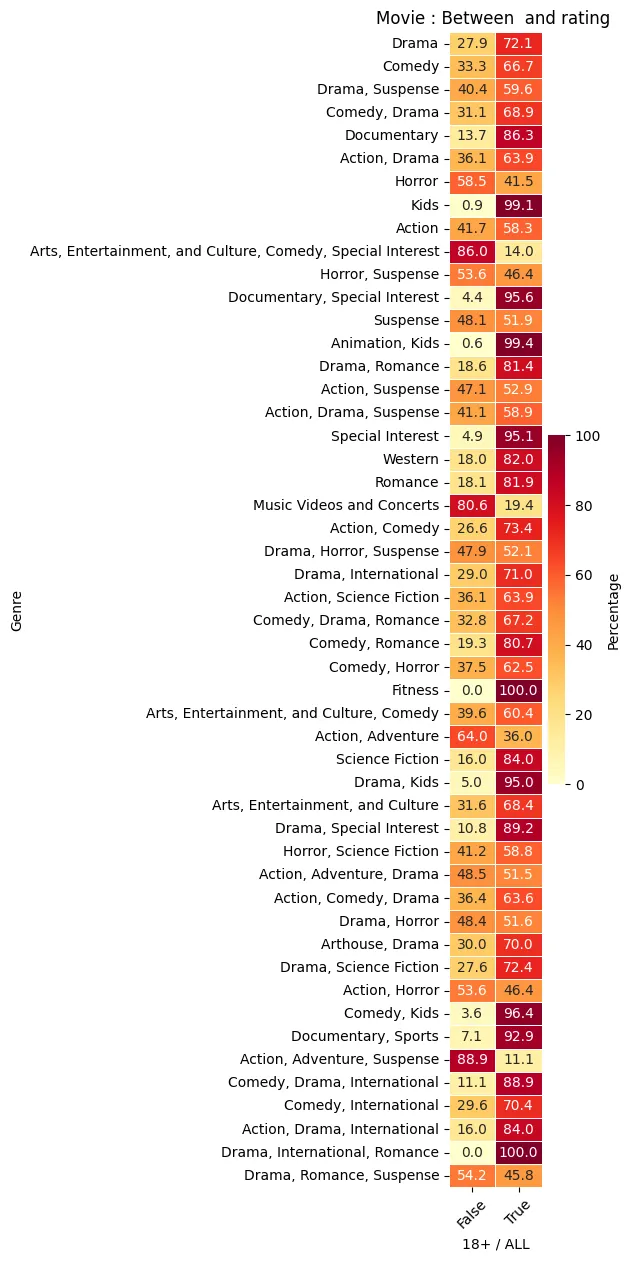

- Amazon의 경우 장르에따라 성인 분류로 받기 쉬운 장르가 있는 것으로 보인다.
하지만 우리가 예상했던 것 이외의 장르에서도 꾀 높은 퍼센트로 성인컨탠츠 분류를 받은 장르도 있다.

#### 4.9.2 특정 Country 에서 제작한 컨텐츠는 그 국가의 문화적 가치관에 따라 Rating  분포가 다를 것이다.

```python
# 데이터 재구성
pivot_data = df.pivot_table(index='country', columns='rating', aggfunc='size', fill_value=0)

# 상위 20개 국가 선택
top_20_countries = pivot_data.sum(axis=1).nlargest(20).index
pivot_data_top20 = pivot_data.loc[top_20_countries]

# 데이터 정규화 (백분율로 변환)
normalized_data = pivot_data_top20.div(pivot_data_top20.sum(axis=1), axis=0) * 100

# 히트맵 생성
plt.figure(figsize=(15, 10))
sns.heatmap(normalized_data, annot=True, cmap='YlOrRd', fmt='.1f',
            cbar_kws={'label': 'Percentage'}, linewidths=0.5)

plt.title('Normalized Rating Distribution by Top 20 Countries')
plt.xlabel('Rating')
plt.ylabel('Country')

plt.show()
```

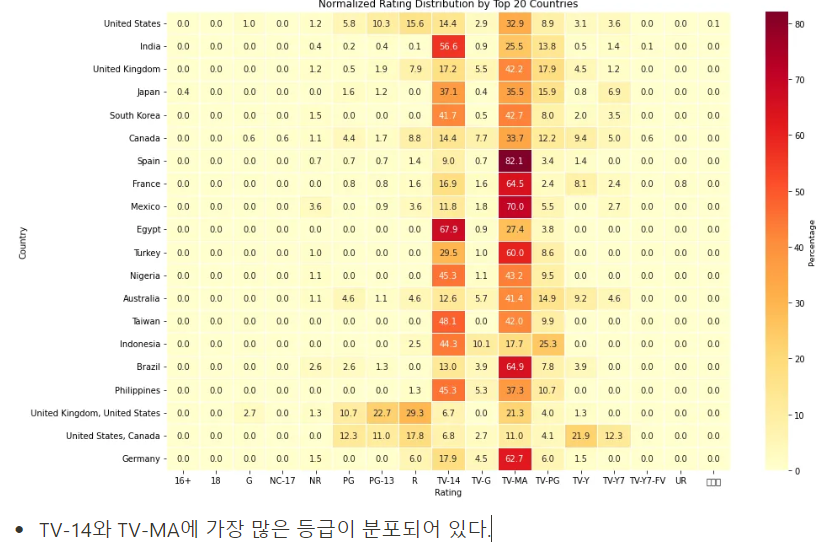

- 추가 가설 : 특정 Country 에서 제작한 컨텐츠는 그 국가의 문화적 가치관에 따라 family_friendly 분포가 다를 것이다.

```python
# 데이터 정규화 및 백분율 변환
normalized_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# 상위 20개 국가 선택
top_20_countries = pivot_data.sum(axis=1).nlargest(20).index
normalized_data_top20 = normalized_data.loc[top_20_countries]

# 히트맵 생성
plt.figure(figsize=(15, 10))
sns.heatmap(normalized_data_top20, annot=True, cmap='YlOrRd', fmt='.1f',
            cbar_kws={'label': 'Percentage'}, square=True, linewidths=0.5)

plt.title('Heatmap of Rating Distribution by Country (Top 20 Countries, Normalized)')
plt.xlabel('Rating')
plt.ylabel('Country')

# Legend 수정
new_labels = ['Family Friendly' if col != 'TV-MA' else 'Mature' for col in normalized_data_top20.columns]

plt.tight_layout()
plt.show()
```

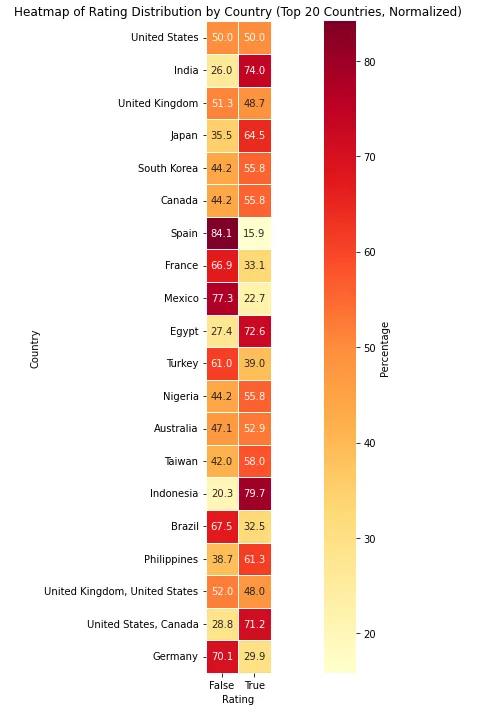

- 유럽 국가는 Mature 컨텐츠가 많고, 중동은 family friendly, 아시아는 비슷한 비율을 가지고 있다.

- Amazon `Country` 컬럼 값이 많이 부족한 관계로 해당 가설검증은 시행하지 않는다.

In [ ]:
# 'country' 컬럼 값의 개수를 계산
country_counts = df_copy['country'].value_counts()

# 2편 이상인 국가 필터링
filtered_country_counts = country_counts[country_counts >= 2]

# 옆으로 눕힌 막대 그래프 (역순 정렬)
plt.figure(figsize=(10, 4))
filtered_country_counts.sort_values(ascending=True).plot(kind='barh')

# 그래프 꾸미기
plt.title('Countries with 2 or More Titles')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()  # 레이아웃 조정
plt.show()

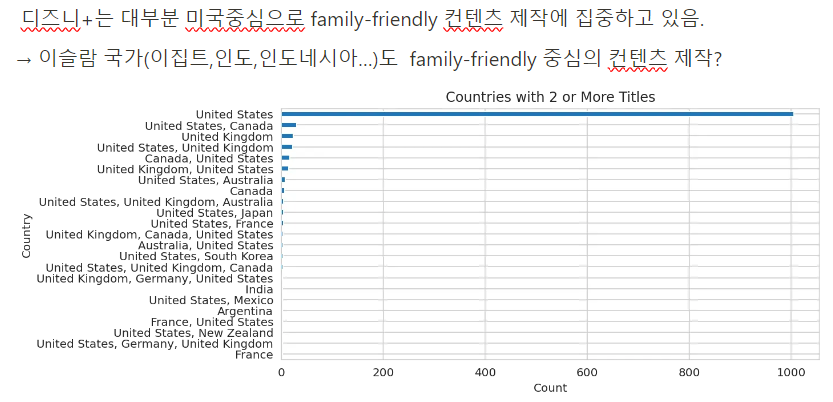

#### 4.9.3 data_added에 따른 주력 컨텐츠 rating과 listed in가 있을 것이고(데이터셋), 그것이 수익성을 반영할 것이다

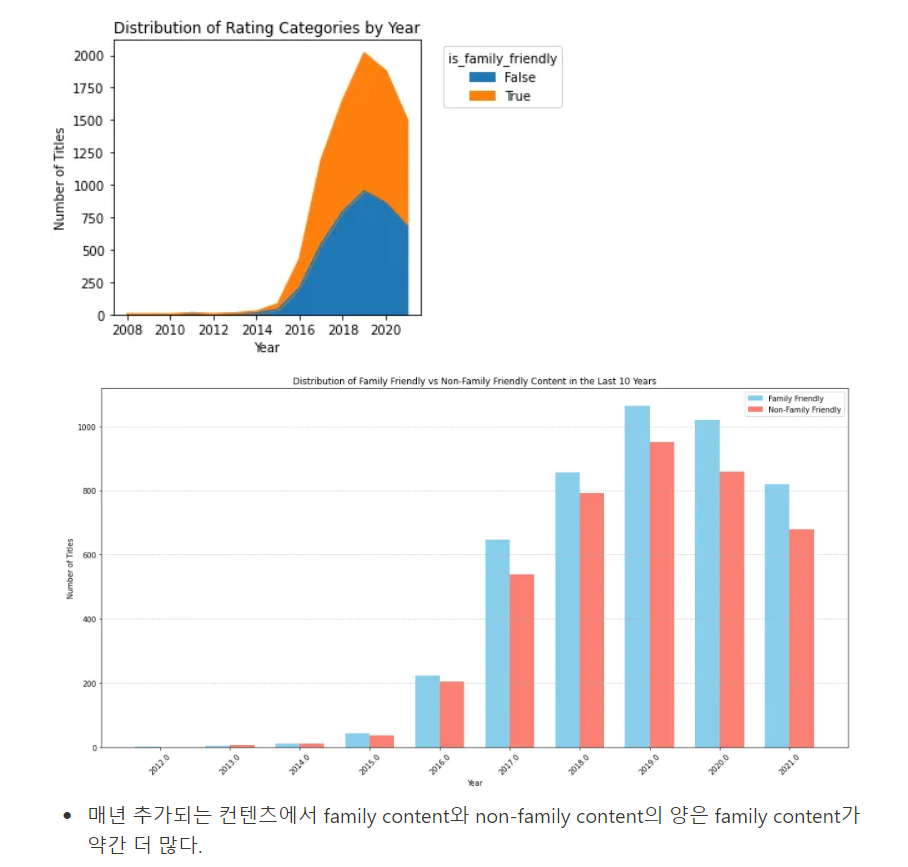

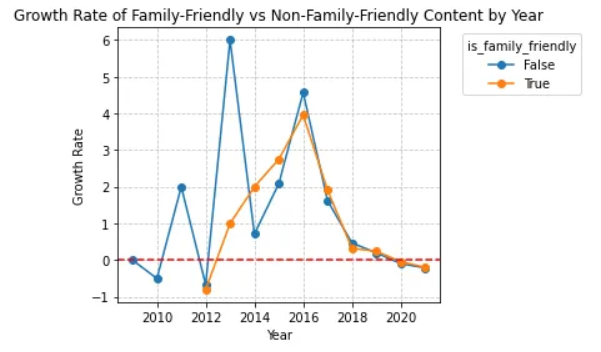

- 가족 친화적인 컨텐츠와 그렇지 않은 컨텐츠의 연도별 컨텐츠 증가율은 비슷한 수준이었다.

In [ ]:
# 'listed_in'에서 카테고리를 쉼표로 나누고 확장
df_copy_exploded = df_copy.assign(listed_in=df_copy['listed_in'].str.split(', ')).explode('listed_in')

# Release year를 5년 단위로 그룹화하기 위한 범위 생성
df_copy_exploded['year_group'] = (df_copy_exploded['release_year'] // 5) * 5

# 5년 단위와 카테고리별로 그룹화하여 개수 계산
category_per_group = df_copy_exploded.groupby(['year_group', 'listed_in']).size().unstack(fill_value=0)

# 그래프 그리기
plt.figure(figsize=(12, 8))
category_per_group.plot(kind='bar', stacked=True, figsize=(12, 8))

# 그래프 꾸미기
plt.title('Category Distribution by 5-Year Intervals')
plt.xlabel('5-Year Intervals')
plt.ylabel('Count of Categories')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 옆으로 이동
plt.tight_layout()  # 레이아웃 조정
plt.show()


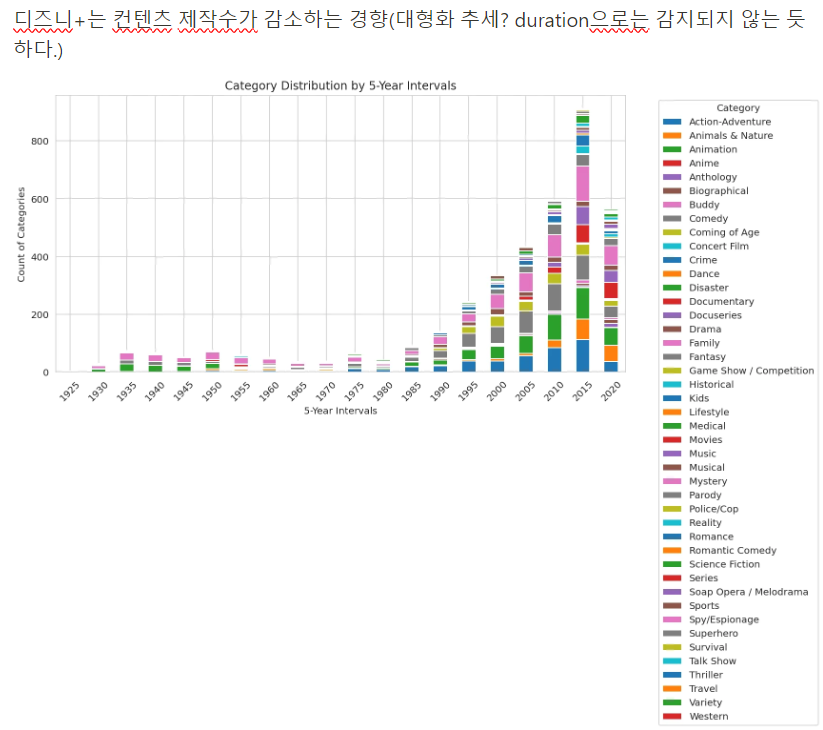

In [ ]:
# duration과 type별 데이터 개수 계산
grouped_data = df_copy.groupby(['type', 'duration']).size().reset_index(name='count')

# 2개 이상인 데이터만 필터링
filtered_data = grouped_data[grouped_data['count'] >= 2]

# type별로 개수를 기준으로 정렬
sorted_data = filtered_data.sort_values(by='count', ascending=False)

# 그래프 그리기
plt.figure(figsize=(20, 6))
for t in sorted_data['type'].unique():
    data = sorted_data[sorted_data['type'] == t]
    plt.bar(data['duration'], data['count'], label=t)

# 그래프 꾸미기
plt.title('Count by Duration and Type (2 or More)', fontsize=16)
plt.xlabel('Duration', fontsize=13)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=270)  # x축 라벨 회전
plt.legend(title='Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축에 그리드 추가
plt.tight_layout()  # 레이아웃 조정

# 그래프 표시
plt.show()

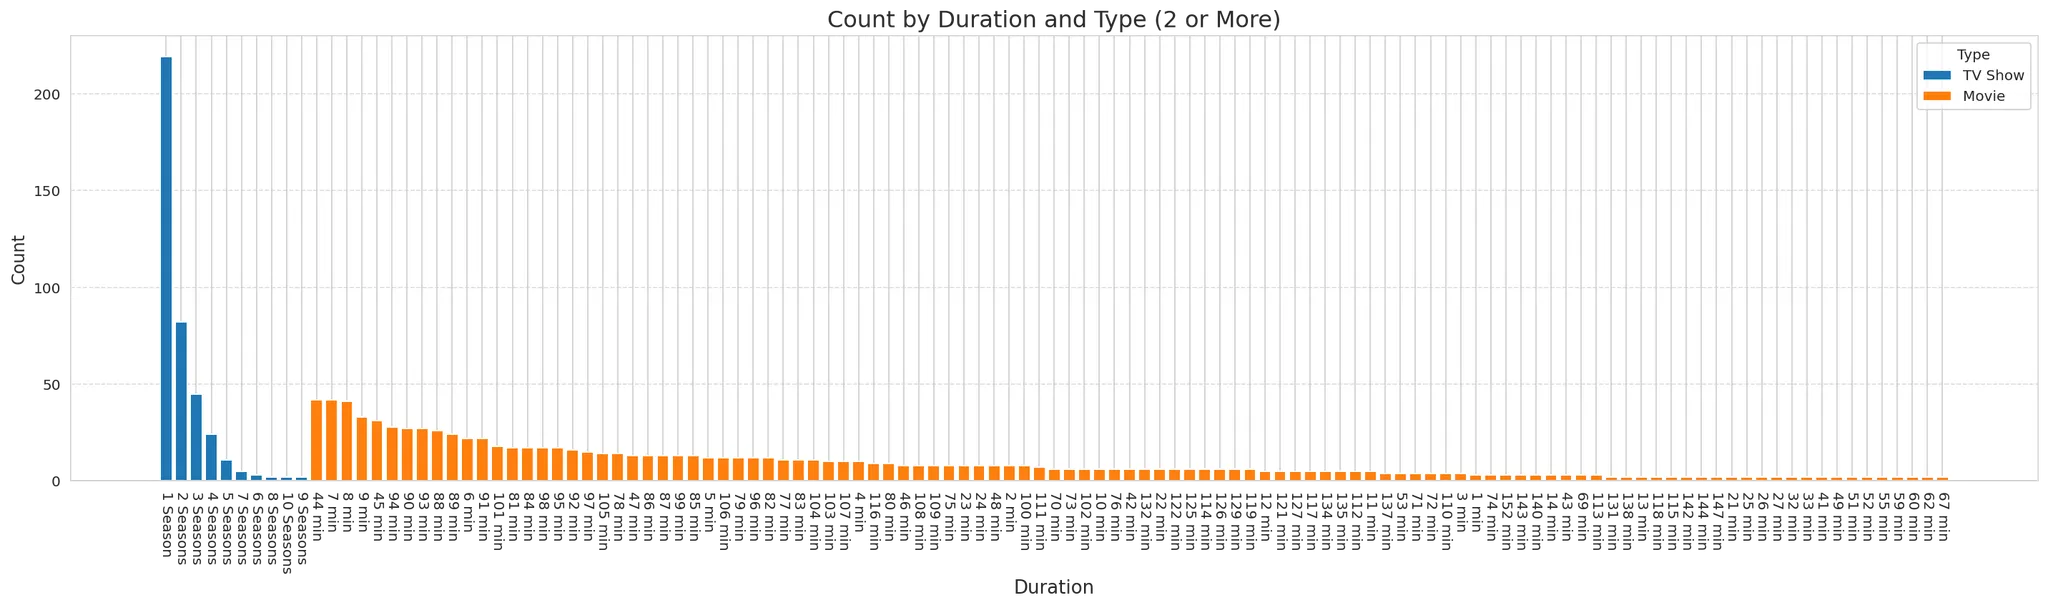

#### 4.9.4 type 에 따라 rating 의 분포가 다를 것이다.

#### Netflix
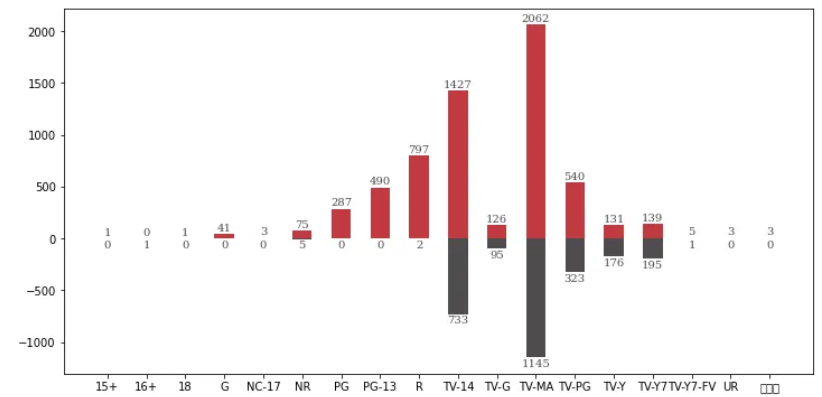

추가 가설 : type 에 따라 is_family_friendly 의 분포가 다를 것이다.
rating -> family friendly

- 성인용 컨텐츠와 비성인용 컨텐츠 2가지로 분류
- family friendly : ['PG-13', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-G', 'G', '15+', 'TV-Y7-FV', '16+']
- mature : ['UR', 'R', 'NC-17', 'TV-MA', '청불', '18']
- 등급 분류는 아래 Netflix 등급 분류를 참고하였습니다. (미국 기준)
    - https://help.netflix.com/en/node/2064/us

```python
mf = df_copy.groupby('type')['is_family_friendly'].value_counts().unstack().sort_index().fillna(0).astype(int)

# 비율 계산
mf_ratio = mf.div(mf.sum(axis=1), axis=0)

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 4))

mf_ratio.plot(kind='bar', stacked=True, ax=ax)

# 그래프 꾸미기
ax.set_xlabel('Type')
ax.set_ylabel('Ratio')
ax.set_title('TV Show, Movie Family-Friendly Ratio')
ax.legend(['Family-Friendly', 'Mature'])

# 비율 표시
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f', label_type='center')

plt.tight_layout()
plt.show()
```

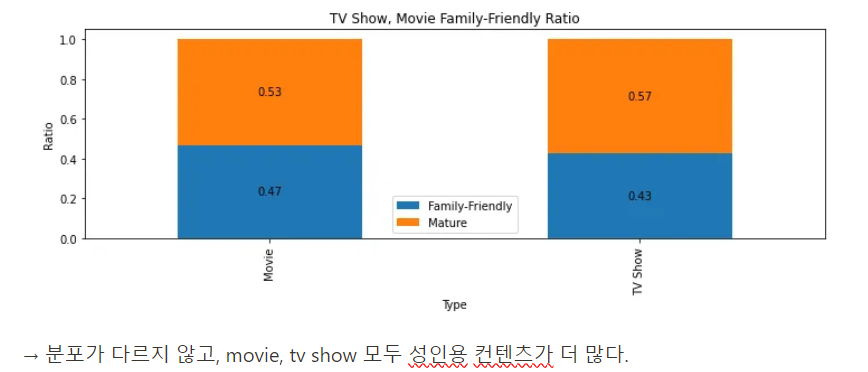

#### Amazon
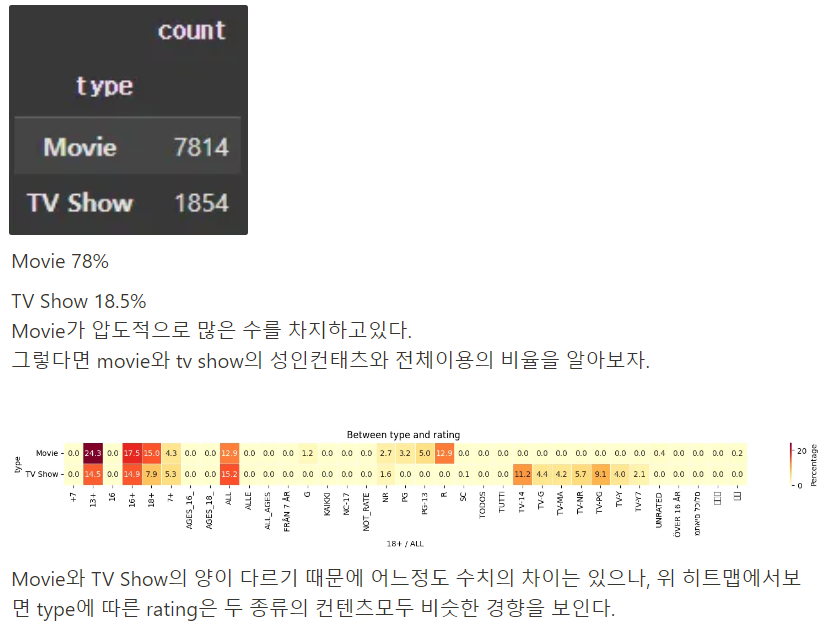

In [ ]:
# type과 is_family_friendly를 사용한 히트맵. 상위에 링크되는 두 컬럼의 관계 보기.

# 데이터 재구성
pivot_data = amazon_prime_df.pivot_table(index='type', columns='is_family_friendly', aggfunc='size', fill_value=0)

# 상위 50가지의 장르(listed_in)
top_50_countries = pivot_data.sum(axis=1).nlargest(50).index
pivot_data_top50 = pivot_data.loc[top_50_countries]

# 데이터 정규화 (백분율로 변환)
normalized_data = pivot_data_top50.div(pivot_data_top50.sum(axis=1), axis=0) * 100

# 히트맵 생성
plt.figure(figsize=(1.5, 1))
sns.heatmap(normalized_data, annot=True, cmap='YlOrRd', fmt='.1f',
            cbar_kws={'label': 'Percentage'}, linewidths=0.5)

plt.title('Between type and rating ')
plt.xlabel('18+ / ALL')
plt.ylabel('type')

plt.show()

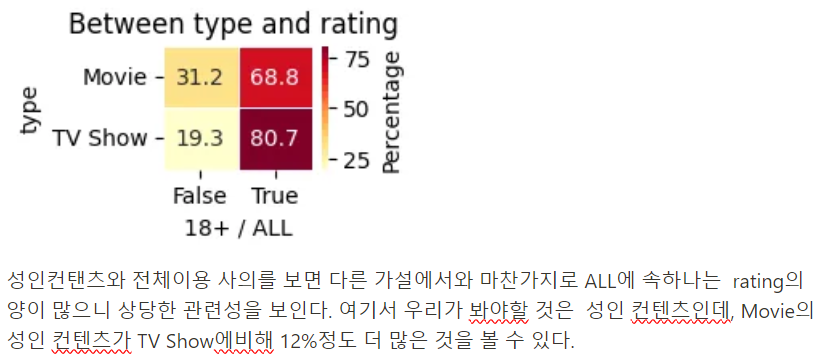

In [ ]:
mf = df_copy.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)

movie = mf.loc['Movie']
tv = mf.loc['TV Show']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='red', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='blue', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}",
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

for i in movie.index:
    ax.annotate(f"{movie[i]}",
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

#### Disney
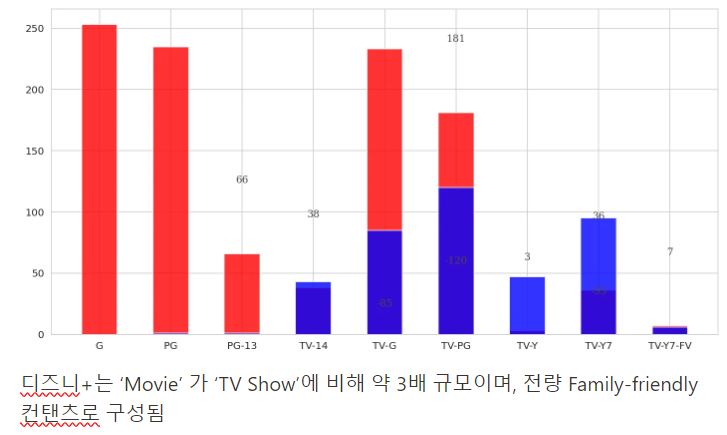

## 5. 결론
- 모든 플랫폼에서 공통적으로 코미디 장르가 높은 비중을 차지한다. 가벼운 컨텐츠를 선호하는 경향이 있다.

- 모든 플랫폼에서 공통적으로 자국 중심의 컨텐츠 제작이 높은 비중을 차지한다.

- 코로나 시기 전후로 Non-Family-Friendly 컨텐츠가 많이 증가했다. 자극적인 컨텐츠를 선호하는 경향이 있다.

- 디즈니는 애니메이션 장르에 특화되어 있으며, 가족 친화적인 컨텐츠를 중심으로 가족 단위 시청자를 타겟으로 한다.

- 넷플릭스는 성인 컨텐츠에 특화되어 있으며, 다양한 연령층을 타겟으로 한다.

## 6. 회고
#### 프로젝트 진행과정

| 일정 | 주요 활동 | 사용 도구 | 세부 내용 |
|------|-----------|-----------|-----------|
| 1일차 | 문제 정의 | Notion | • OTT 플랫폼 간 콘텐츠 트렌드 분석 목표 설정
|  | 데이터 확인 | Kaggle, Colab | • Netflix, Disney+, Amazon Prime Video 데이터셋 탐색<br>• 데이터 구조 및 특성 파악 |
|  | 데이터 전처리 | Colab | • 결측치, 이상치 처리<br>• 'Rating'을 'Family-Friendly' 컬럼으로 변환 |
| 2일차 | 가설 수립 | Notion | • 플랫폼별 콘텐츠 특성에 대한 가설 설정<br>• 장르 분포, 가족 친화도 등에 대한 가설 수립 |
|  | 가설 검증 | Colab, GitHub | • 데이터 분석을 통한 가설 검증
| 3일차 | 데이터 시각화 | Colab, Gamma | • 분석 결과의 시각화<br>• 인사이트를 효과적으로 전달할 수 있는 그래프 및 차트 제작 |
|  | 인사이트 도출 | Notion | • 분석 결과에 대한 팀 논의<br>• 주요 발견사항 정리 |
|  | 외부 자료 활용 | - | • OTT 시장 동향 및 관련 연구 자료 조사<br>• 분석 결과의 맥락화 및 해석 |
|  | 최종 발표 준비 | Gamma | • 프로젝트 결과 정리<br>• 발표 자료 제작 |

#### 팀 구성 및 역할

| 역할 | 이름 | 담당 데이터셋 | 주요 책임 |
|------|------|--------------|-----------|
| 팀장 | 안승보 | 전체 데이터셋 | • 프로젝트 방향성 설정<br>• 데이터 크롤링 |
| 팀원 | 김대환 | Netflix 데이터셋 | • Netflix 데이터 탐색 및 전처리 |
| 팀원 | 강소안 | Disney+ 데이터셋 | • Disney+ 데이터 탐색 및 전처리 |
| 팀원 | 박형호 | Amazon Prime Video 데이터셋 | • Amazon Prime Video 데이터 탐색 및 전처리 |

#### 안승보

- 좋은 팀원들과 함께할 수 있는 소중한 기회였습니다.
- 프로젝트 목표와 방향성을 잡는 게 가장 어려웠는데 팀원들과 함께 토의하고, 개선해나갈 수 있었습니다.

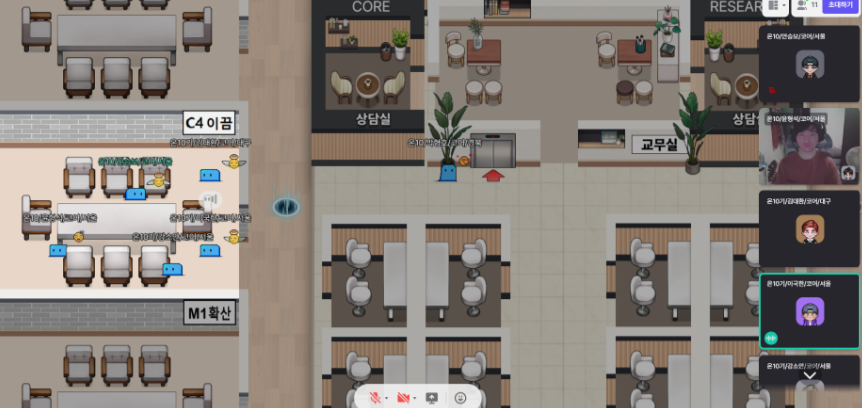

#### 박형호
- 맡은 부분
    
    Amazon Prime 데이터셋을 통해 위 가설들을 검증.
    PPT에서 Netflix, Amazon, Disney 데이터셋의 비교 및 관련 데이터에 대한 크래프 작성.
    
- 데이터 셋에 대한 생각
    
    Amazon Prime 데이터 셋의 경우 다른 데이터셋(Netflix, Disney)에 비해 많은부분이 결측치로 되어 있어 전처리과정이 필요하였고, 이를 팀장인 승보님이 크롤링을 이용하여 처리해 주셨다. 하지만 다른 데이터 컬럼에 대한 결측치는 처리하지 못하였다. 만약 이러한 학습목적이 아닌 실제 현업이였다면, 이러한 데이터는 어떻게 해서든 유용한 데이터로 교체해야하니 많은 시간이 소요될 것같다.
    
- 이번 데이터 툰에서 느낀점.
먼저 Amazon Prime의 데이터셋의 결측치 때문에 크롤링이라는 단계를 하나더 해야 했고 이를 팀장인 안승보님이 해주셨다.
 그렇게 되면서 승보님의 일이 더 널어나게 되어 승보님의 일이 더 늘어 나게 되었다.
크롤링에 대한 학습이 없어 할 수 없었지만, 내가 맡은 부분을 직접 해결하지 못하면, 팀이 결과를 낼 때 까지의 진행과정에 많은 지장을 줄 수 있겠다는 생각을 한다.
또한 데이터 셋의 결측치가 많은 만큼 다른 팀원분들에 비해 할 수 있는 일이 현저히 적었는데, 그렇게 되면서 다른 분들에비해 하는 일이 적었다.
 좀 더 적극적으로 다른 부분에서라도 유의미한 결과를 낼 수 있었지 않았을까 생각해 본다.

#### 강소안
**1. 낯설음에서 시작된 데이타톤**

OTT라는 생소한 주제와 개념으로 인해 초기에 막막함을 느꼈지만, 자료 조사와 팀원들과의 협력을 통해 점차 이해를 넓혔습니다. 이를 통해 OTT 분야에 자신감을 얻을 수 있었습니다.

**2. 능력 있는 팀원과의 협업**

각 분야에서 뛰어난 역량을 가진 팀원들과 함께하며 프로젝트의 완성도를 높일 수 있었다고 생각합니다. 새벽까지 작업에 열중하는 팀원들을 보며 감탄과 팀워크에 의존하는 미안함도 새삼 느꼈습니다.

**3. 짧은 기간에 얻은 큰 배움과 성과**

짧은 시간 안에 데이터 분석 기술과 산업 동향에 대한 이해를 넓히고, 실무에서 적용할 수 있는 분석 방법을 체득할 수 있는 좋은 기회였다고 생각합니다.

#### 김대환
- 최고의 팀에 속할 수 있어 감사했다.
- Netflix 데이터 부분을 담당하고 초기 팀 activation에 서포트하고자 했다.
- 생각의 확장과 정리를 하는 회의 과정에서 팀장을 중심으로 팔로어와 중재자 역할을 노력했다.
- 둘째 날 함께 하지 못한 미안함에 발표자료 만들기에 자원하는 마음으로 나름 열성을 다했다.
- 실제 산업, 실제 라이프스타일과 연결된 데이터를 가지고 생각과 사실의 차이를 검증이라는 과정을 통해 확인 데이터분석의 묘미를 느낄 수 있는 프로젝트였다.
- 데이터 불균형이라는 상황도 어떻게 보면 실무적으로 할 수 있는 고민을 간접적 할 수 있는 기회였기에 유익했다.
- 데이터톤의 성격상 로직트리적인 소통이 프로젝트 플로우에 중요하며 그런 접근법에 인사이트를 얻기 위한 초기 리서치 과정의 비중도 중요했던 것 같다.